# Random Slither.io

In [1]:
import universe, gym
import numpy as np
import tensorflow as tf

### Load the environment

In [2]:
env = gym.make('internet.SlitherIO-v0')

[2017-05-09 20:28:20,647] Making new env: internet.SlitherIO-v0


In [3]:
# The SlitherIO environment doesn't contain useful sampling of its action
# space. Probably because it's still new.
screen_xrange = (18,522)
screen_yrange = (84,386)
screen_shape = (screen_yrange[1]-screen_yrange[0], screen_xrange[1]-screen_xrange[0])
pixels_shape = (screen_shape[0], screen_shape[1], 3) # color
print (pixels_shape)

(302, 504, 3)


In [4]:
def sample_screen_pos():
    '''Sample an (x,y) point from the playable game window.'''
    return (np.random.randint(*screen_xrange),
            np.random.randint(*screen_yrange))
def sample_action():
    '''Sample an action ready to send to the environment.

    All Slither actions are mouse actions, either a mouse point or a
    primary-button mouse click.
    '''
    point = sample_screen_pos()
    clicking = (np.random.rand() < 0.3)
    return universe.spaces.vnc_action_space.vnc_event.PointerEvent(x=point[0],
                                                                   y=point[1],
                                                                   buttonmask=clicking)
def make_screen_pos_from_percentage(x,y):
    '''
    x: -1,1
    y: -1,1
    '''
    a = sample_action()
    
    x1 = min(max(x/2. + 0.5, 0.), 1.)
    y1 = min(max(y/2. + 0.5, 0.), 1.)
    a.x = x1*(screen_xrange[1] - screen_xrange[0]) + screen_xrange[0]
    a.y = y1*(screen_yrange[1] - screen_yrange[0]) + screen_yrange[0]
    return a

print(sample_action())
print(make_screen_pos_from_percentage(0.5,0.5))
print(make_screen_pos_from_percentage(0,1))
print(make_screen_pos_from_percentage(-1,-.5))
print(make_screen_pos_from_percentage(-10,10))

PointerEvent<x=149 y=373 buttonmask=False>
PointerEvent<x=396.0 y=310.5 buttonmask=True>
PointerEvent<x=270.0 y=386.0 buttonmask=False>
PointerEvent<x=18.0 y=159.5 buttonmask=True>
PointerEvent<x=18.0 y=386.0 buttonmask=False>


In [5]:
s = env.reset()

[2017-05-09 20:28:20,690] Called reset on <Timer<Render<ThrottleVNCEnv<internet.SlitherIO-v0>>>> before configuring. Configuring automatically with default arguments
[2017-05-09 20:28:20,692] Writing logs to file: /tmp/universe-973.log
[2017-05-09 20:28:20,727] Ports used: dict_keys([])
[2017-05-09 20:28:20,728] [0] Creating container: image=quay.io/openai/universe.flashgames:0.20.28. Run the same thing by hand as: docker run -p 5900:5900 -p 15900:15900 --ipc host --privileged --cap-add SYS_ADMIN quay.io/openai/universe.flashgames:0.20.28
[2017-05-09 20:28:21,292] Remote closed: address=localhost:5900
[2017-05-09 20:28:21,296] Remote closed: address=localhost:15900
[2017-05-09 20:28:21,299] At least one sockets was closed by the remote. Sleeping 1s...


universe-dCR4wk-0 | Setting VNC and rewarder password: openai
universe-dCR4wk-0 | [Wed May 10 01:28:21 UTC 2017] Waiting for /tmp/.X11-unix/X0 to be created (try 1/10)
universe-dCR4wk-0 | [Wed May 10 01:28:21 UTC 2017] [/usr/local/bin/sudoable-env-setup] Disabling outbound network traffic for none
universe-dCR4wk-0 | [init] [2017-05-10 01:28:21,552] Launching system_diagnostics_logger.py, recorder_logdir=/tmp/demo
universe-dCR4wk-0 | [init] [2017-05-10 01:28:21,555] Launching reward_recorder.py, recorder_logdir=/tmp/demo
universe-dCR4wk-0 | [init] [2017-05-10 01:28:21,557] Launching vnc_recorder.py, recorder_logdir=/tmp/demo
universe-dCR4wk-0 | [init] [2017-05-10 01:28:21,561] PID 53 launched with command ['sudo', '-H', '-u', 'nobody', 'DISPLAY=:0', 'DBUS_SESSION_BUS_ADDRESS=/dev/null', '/app/universe-envs/controlplane/bin/controlplane.py', '--rewarder-port=15901']
universe-dCR4wk-0 | [tigervnc] 
universe-dCR4wk-0 | [tigervnc] Xvnc TigerVNC 1.7.0 - built Sep  8 2016 10:39:22
universe-d

[2017-05-09 20:28:22,306] Remote closed: address=localhost:5900
[2017-05-09 20:28:22,308] Remote closed: address=localhost:15900
[2017-05-09 20:28:22,310] At least one sockets was closed by the remote. Sleeping 1s...


universe-dCR4wk-0 | [tigervnc] 
universe-dCR4wk-0 | [tigervnc] Wed May 10 01:28:22 2017
universe-dCR4wk-0 | [tigervnc]  Connections: accepted: 172.17.0.1::53554
universe-dCR4wk-0 | [nginx] 2017/05/10 01:28:22 [error] 63#63: *1 connect() failed (111: Connection refused) while connecting to upstream, client: 172.17.0.1, server: , request: "GET / HTTP/1.1", upstream: "http://127.0.0.1:15901/", host: "127.0.0.1:10003"
universe-dCR4wk-0 | [nginx] 172.17.0.1 - openai [10/May/2017:01:28:22 +0000] "GET / HTTP/1.1" 502 182 "-" "-"
universe-dCR4wk-0 | [reward_recorder] [2017-05-10 01:28:22,408] Listening on 0.0.0.0:15898
universe-dCR4wk-0 | [vnc_recorder] [2017-05-10 01:28:22,409] Listening on 0.0.0.0:5899
universe-dCR4wk-0 | [init] [2017-05-10 01:28:22,512] init detected end of child process 17 with exit code 0, not killed by signal
universe-dCR4wk-0 | [2017-05-10 01:28:22,598] [INFO:root] Starting play_controlplane.py with the following: command=['/app/universe-envs/controlplane/bin/controlpla

[2017-05-09 20:28:23,312] Using the golang VNC implementation


universe-dCR4wk-0 | [nginx] 2017/05/10 01:28:23 [info] 63#63: *1 client 172.17.0.1 closed keepalive connection


[2017-05-09 20:28:23,314] Using VNCSession arguments: {'fine_quality_level': 50, 'encoding': 'tight', 'subsample_level': 2, 'start_timeout': 7}. (Customize by running "env.configure(vnc_kwargs={...})"


universe-dCR4wk-0 | [tigervnc] 
universe-dCR4wk-0 | [tigervnc] Wed May 10 01:28:23 2017
universe-dCR4wk-0 | [tigervnc]  Connections: closed: 172.17.0.1::53554 (Clean disconnection)
universe-dCR4wk-0 | [tigervnc]  EncodeManager: Framebuffer updates: 0
universe-dCR4wk-0 | [tigervnc]  EncodeManager:   Total: 0 rects, 0 pixels


[2017-05-09 20:28:23,323] [0] Connecting to environment: vnc://localhost:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a convenient in-browser VNC client: http://localhost:15900/viewer/?password=openai


universe-dCR4wk-0 | [tigervnc]  EncodeManager:          0 B (1:-nan ratio)
universe-dCR4wk-0 | [tigervnc]  Connections: accepted: 172.17.0.1::53566
universe-dCR4wk-0 | [tigervnc]  SConnection: Client needs protocol version 3.8
universe-dCR4wk-0 | [tigervnc]  SConnection: Client requests security type VncAuth(2)


In [6]:
def til_screen_not_none(s1 = [None]):
    while s1[0] is None:
        a = sample_action()
        a.x=a.y=0.2
        print('waiting for not-none. Executing: ',a)
        s1,r,d,v = env.step([[a]])
        import time
        time.sleep(1) # we're just waiting for it to be ready...
    return s1[0]['vision'][screen_yrange[0]:screen_yrange[1], screen_xrange[0]:screen_xrange[1]]

s1 = til_screen_not_none()
s1

universe-dCR4wk-0 | [tigervnc]  VNCSConnST:  Server default pixel format depth 24 (32bpp) little-endian rgb888
waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=False>universe-dCR4wk-0 | [tigervnc]  VNCSConnST:  Client pixel format depth 24 (32bpp) little-endian bgr888

universe-dCR4wk-0 | [2017-05-10 01:28:23,363] [INFO:universe.rewarder.remote] Client connecting: peer=tcp4:127.0.0.1:39438 observer=False
universe-dCR4wk-0 | [2017-05-10 01:28:23,363] [INFO:universe.rewarder.remote] WebSocket connection established
waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=True>
universe-dCR4wk-0 | [nginx] 2017/05/10 01:28:24 [info] 63#63: *5 client sent invalid request while reading client request line, client: 127.0.0.1, server: , request: "CONNECT www.google.com:443 HTTP/1.1"
universe-dCR4wk-0 | [nginx] 2017/05/10 01:28:24 [info] 63#63: *6 client sent invalid request while reading client request line, client: 127.0.0.1, server: , request: "CONNECT www.g

[2017-05-09 20:28:37,767] [0:localhost:5900] Sending reset for env_id=internet.SlitherIO-v0 fps=60 episode_id=0


universe-dCR4wk-0 | [2017-05-10 01:28:37,769] [INFO:universe.rewarder.remote] Received reset message: {'headers': {'episode_id': '0', 'sent_at': 1494379717.768333, 'message_id': 10}, 'method': 'v0.env.reset', 'body': {'env_id': 'internet.SlitherIO-v0', 'fps': 60, 'seed': None}}
universe-dCR4wk-0 | [2017-05-10 01:28:37,779] [INFO:root] [EnvStatus] Changing env_state: running (env_id=None) -> resetting (env_id=internet.SlitherIO-v0) (episode_id: 1->2, fps=60)
universe-dCR4wk-0 | [2017-05-10 01:28:37,780] [ERROR:root] Closing server (via subprocess.close()) and all chromes (via pkill chromedriver || :; pkill chrome || :)
universe-dCR4wk-0 | [2017-05-10 01:28:37,780] [INFO:root] [Rewarder] Blocking until env finishes resetting
universe-dCR4wk-0 | [init] [2017-05-10 01:28:37,791] init detected end of child process 113 with exit code 0, killed by SIGTERM: 15
universe-dCR4wk-0 | [init] [2017-05-10 01:28:37,802] init detected end of child process 128 with exit code 0, not killed by signal
univ

[2017-05-09 20:28:52,859] [0:localhost:5900] Initial reset complete: episode_id=2


universe-dCR4wk-0 | [2017-05-10 01:28:52,856] [INFO:root] [Rewarder] Changing reward_parsers: None -> internet.SlitherIO-v0
universe-dCR4wk-0 | [2017-05-10 01:28:52,857] [INFO:root] [Rewarder] Writing internet.SlitherIO-v0 to /tmp/demo/env_id.txt
waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=False>


array([[[130, 130, 130],
        [140, 140, 140],
        [147, 147, 147],
        ..., 
        [140, 144, 143],
        [145, 149, 148],
        [151, 155, 154]],

       [[162, 162, 162],
        [178, 178, 178],
        [145, 145, 145],
        ..., 
        [154, 158, 161],
        [157, 161, 164],
        [160, 164, 167]],

       [[149, 154, 158],
        [154, 159, 163],
        [ 30,  37,  43],
        ..., 
        [ 39,  41,  54],
        [ 39,  41,  54],
        [ 39,  41,  54]],

       ..., 
       [[136, 136, 136],
        [160, 160, 160],
        [  0,   0,   0],
        ..., 
        [ 14,  14,  14],
        [ 11,  11,  11],
        [  9,   9,   9]],

       [[154, 154, 154],
        [151, 151, 151],
        [  0,   0,   0],
        ..., 
        [ 10,  10,  10],
        [ 10,  10,  10],
        [ 10,  10,  10]],

       [[156, 156, 156],
        [150, 150, 150],
        [ 31,  31,  31],
        ..., 
        [ 14,  14,  14],
        [ 17,  17,  17],
        [ 19,  19,

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def showarray(a):
    plt.imshow(a)

universe-dCR4wk-0 | [2017-05-10 01:28:54,689] [INFO:gym_controlplane.registration] Loaded scorer: <gym_controlplane.reward.score.OCRScorerV0 object at 0x7f1919b889e8>


In [8]:
s1 = til_screen_not_none()

[2017-05-09 20:28:54,739] Throttle fell behind by 1.27s; lost 76.06 frames


waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=True>
universe-dCR4wk-0 | [2017-05-10 01:28:54,859] [INFO:gym_controlplane.registration] Created reward parser for internet.SlitherIO-v0: Reward<scorer=<gym_controlplane.reward.score.OCRScorerV0 object at 0x7f1919b889e8> vexpect=VExpect<{'ready2': <gym_controlplane.integration.transition.ClickTransition object at 0x7f18edcdb278>, 'ready0': <gym_controlplane.integration.transition.ClickTransition object at 0x7f18edcdb518>, 'ready1': <gym_controlplane.integration.transition.ClickTransition object at 0x7f18edcdb710>}>>
universe-dCR4wk-0 | [2017-05-10 01:28:54,860] [INFO:root] Using metadata_encoding={'y': 658, 'x': 914, 'height': 100, 'width': 100, 'type': 'qrcode'} probe_key=96 subscription=[(79, 25, 482, 25), (47, 25, 481, 25), (96, 25, 480, 25), (62, 100, 730, 18), (914, 100, 658, 100)]
universe-dCR4wk-0 | [2017-05-10 01:28:54,861] [INFO:universe.rewarder.remote] [Rewarder] Over past 19.83s, sent 0 reward messages to

In [26]:
input_pixels = tf.placeholder(tf.uint8, shape=pixels_shape, name='input_pixs')
bw_pixels = tf.image.convert_image_dtype(tf.image.rgb_to_grayscale(input_pixels), dtype=tf.float32)
def make_conv(input_img, filter_tensor, stride):
    layer1 = tf.nn.conv2d([input_img], filter_tensor, stride, padding="VALID")
    return layer1

universe-dCR4wk-0 | [2017-05-10 01:30:14,099] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.55s, sent 2 reward messages to agent: reward=4.0 reward_min=2.0 reward_max=2.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1294}


In [27]:
sess = tf.Session()

universe-dCR4wk-0 | [2017-05-10 01:30:16,265] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=5.2 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=8850.0 vnc_pixels_ps[total]=44790.4 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:30:16,266] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "44.89us", "mean": "97.44us"}, "score.crop_cache.readthrough.OCRScorerV0": {"calls": 4, "std": "1.81ms", "mean": "8.58ms"}, "reward.parsing.score": {"calls": 26, "std": "3.24ms", "mean": "1.58ms"}, "rewarder.compute_reward": {"calls": 301, "std": "1.09ms", "mean": "399.63us"}, "score.crop_cache.get.MatchImage": {"calls": 78, "std": "15.14us", "mean": "30.88us"}, "reward.parsing.gameover": {"calls": 26, "std": "51.16us", "mean": "177.47us"}, "rewarder.frame": {"calls": 301, "std": "267.22us", "mean": "16.92ms"},

In [28]:
s1 = til_screen_not_none()

[2017-05-09 20:30:29,434] Throttle fell behind by 38.44s; lost 2306.35 frames


waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=False>
universe-dCR4wk-0 | [2017-05-10 01:30:29,506] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.32s, sent 3 reward messages to agent: reward=15.0 reward_min=1.0 reward_max=8 done=False info={'rewarder.profile': '<2071 bytes>', 'rewarder.vnc.updates.bytes': 1346, 'rewarder.vnc.updates.pixels': 10000, 'rewarder.vnc.updates.n': 1}


In [29]:
init_op = tf.global_variables_initializer()
# Run the 'init' op
sess.run(init_op)

universe-dCR4wk-0 | [2017-05-10 01:30:31,922] [INFO:universe.utils] [gameover] Gameover screen detected: distance_n=[0.0, 0.0, 0.0] match_time=265us
universe-dCR4wk-0 | [2017-05-10 01:30:31,922] [INFO:gym_controlplane.reward.reward] RESET CAUSE: gameover state reached
universe-dCR4wk-0 | [2017-05-10 01:30:31,922] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.42s, sent 3 reward messages to agent: reward=5.0 reward_min=0.0 reward_max=4.0 done=True info={'rewarder.vnc.updates.pixels': 1691, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 4865}
universe-dCR4wk-0 | [2017-05-10 01:30:31,923] [INFO:root] [Rewarder] Resetting environment since done=True
universe-dCR4wk-0 | [2017-05-10 01:30:31,923] [INFO:root] [Rewarder] Triggering a reset on EnvController
universe-dCR4wk-0 | [2017-05-10 01:30:31,924] [INFO:root] [EnvStatus] Changing env_state: running (env_id=internet.SlitherIO-v0) -> resetting (env_id=internet.SlitherIO-v0) (episode_id: 4->5, fps=60)
universe-dCR4wk-0 | [

0.0 1.0


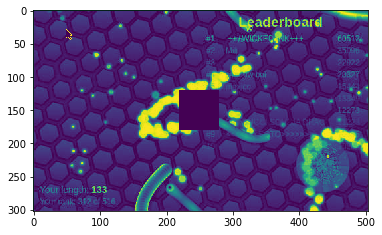

In [30]:
def hide_spots(img):
    hidden_spots = img
    hidden_spots[120:180,220:280] = 0.0  # Hide the worm
    #hidden_spots[195:275,395:475] = 0.0  # Hide the map
    return hidden_spots

hidden_spots = hide_spots(s1)
bw = sess.run(bw_pixels, feed_dict={input_pixels:hidden_spots})
print(bw.min(), bw.max())
showarray(bw.reshape(hidden_spots.shape[:-1]))

In [31]:
def test_filter_and_stride(s1, input_img, filters, filter_, stride_):
    filter_ = (filter_/np.linalg.norm(filter_))
    filter_tensor = tf.placeholder(tf.float32, shape=filter_.shape, name='filter1')
    new_filters = {**filters, **{filter_tensor:filter_}}
    normalized_img = tf.nn.l2_normalize(tf.nn.l2_normalize(input_img,0),1)
    l1 = make_conv(normalized_img,filter_tensor,stride_)
    l1 = l1[0]
    img_for_disp = sess.run(l1, feed_dict={**new_filters, **{input_pixels:s1}})
    img_for_disp = img_for_disp.reshape(img_for_disp.shape[:-1])
    showarray(img_for_disp)
    print (img_for_disp.shape)
    return l1,img_for_disp,new_filters

universe-dCR4wk-0 | [2017-05-10 01:30:33,451] [selenium_wrapper_server] Call to webdriver.Chrome() completed: 1.28s
universe-dCR4wk-0 | [2017-05-10 01:30:33,452] [INFO:gym_flashgames.launcher] [EnvController] Navigating browser to url=http://localhost/internet.SlitherIO-v0
universe-dCR4wk-0 | [2017-05-10 01:30:33,589] [INFO:root] [EnvController] Running command: /app/universe-envs/controlplane/bin/play_vexpect -e internet.SlitherIO-v0 -r vnc://127.0.0.1:5900 -d


universe-dCR4wk-0 | [2017-05-10 01:30:34,229] [play_vexpect] No rewarder addresses were provided, so this env cannot connect to the remote's rewarder channel, and cannot send control messages (e.g. reset)
universe-dCR4wk-0 | [2017-05-10 01:30:34,229] [play_vexpect] Using the golang VNC implementation
universe-dCR4wk-0 | [2017-05-10 01:30:34,229] [play_vexpect] Using VNCSession arguments: {'subsample_level': 2, 'encoding': 'zrle', 'fine_quality_level': 50, 'start_timeout': 7, 'compress_level': 0}. (Customize by running "env.configure(vnc_kwargs={...})"
(100, 168)
0.0 universe-dCR4wk-0 | [2017-05-10 01:30:34,230] [play_vexpect] Printed stats will ignore clock skew. (This usually makes sense only when the environment and agent are on the same machine.)
0.42185
universe-dCR4wk-0 | [2017-05-10 01:30:34,235] [play_vexpect] [0] Connecting to environment: vnc://127.0.0.1:5900 password=openai. If desired, you can manually connect a VNC viewer, such as TurboVNC. Most environments provide a conve

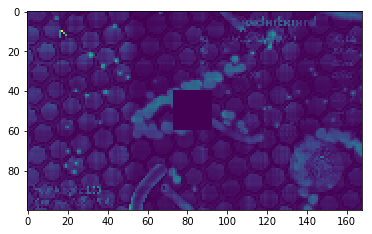

universe-dCR4wk-0 | [2017-05-10 01:30:38,469] [play_vexpect] Advancing to the next hopeful state (2/3): ready1


In [32]:
outline_filter = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0,],
])[:,:,np.newaxis,np.newaxis]
strides = [1,3,3,1]

filters = {}
l1,l1_disp, filters = test_filter_and_stride(s1, bw_pixels, filters, outline_filter, strides)
print(l1_disp.min(), l1_disp.max())

(32, 55)
-0.22066 0.345052


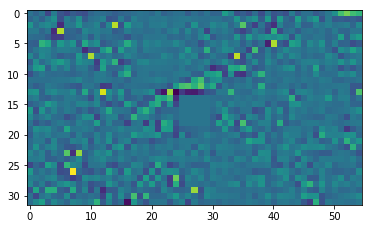

universe-dCR4wk-0 | [2017-05-10 01:30:41,487] [play_vexpect] Applying transition: ClickTransition<ready1->[] x=0 y=0 buttonmask=0> for active state ready1. (Summary: plausible_states=[ready0, ready1, ready2] distance_m=[0.0049178139, 0.0, 0.0] match_time_m=['224us', '82us', '67us'])
universe-dCR4wk-0 | [2017-05-10 01:30:41,487] [play_vexpect] Reaching start state: ready1
universe-dCR4wk-0 | [2017-05-10 01:30:41,487] [play_vexpect] vexpect macro complete in 7.216859s
universe-dCR4wk-0 | [tigervnc] 
universe-dCR4wk-0 | [tigervnc] Wed May 10 01:30:41 2017
universe-dCR4wk-0 | [tigervnc]  Connections: closed: 127.0.0.1::37362 (Clean disconnection)
universe-dCR4wk-0 | [tigervnc]  EncodeManager: Framebuffer updates: 8
universe-dCR4wk-0 | [tigervnc]  EncodeManager:   ZRLE:
universe-dCR4wk-0 | [tigervnc]  EncodeManager:     Solid: 5 rects, 508 pixels
universe-dCR4wk-0 | [tigervnc]  EncodeManager:            150 B (1:13.9467 ratio)
universe-dCR4wk-0 | [tigervnc]  EncodeManager:     Bitmap RLE: 2

In [33]:
food_feature_kernel = np.array([
    [-8, -8, -8, -8, -8],
    [-8,  8,  16,  8, -8],
    [-8,  16, 32,  16, -8],
    [-8,  8,  16,  8, -8],
    [-8, -8, -8, -8, -8],
])[:,:,np.newaxis,np.newaxis]

strides = [1,3,3,1]
food_feature, food_disp, filters = test_filter_and_stride(s1, l1, filters, food_feature_kernel, strides)
print(food_disp.min(), food_disp.max())

(32, 55)
-0.510626 0.349238


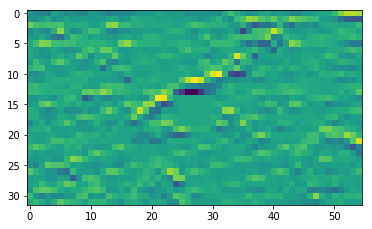

In [34]:
snake_feature_kernel = -np.array([
    [ 8,  8,  8,  8,  8],
    [-2, -2, -2, -2, -2],
    [-2, -2, -2, -2, -2],
    [-2, -2, -2, -2, -2],
    [-2, -2, -2, -2, -2],
])[:,:,np.newaxis,np.newaxis]
strides = [1,3,3,1]
snake_feature,snake_img, filters = test_filter_and_stride(s1, l1, filters, snake_feature_kernel, strides)
print(snake_img.min(), snake_img.max())

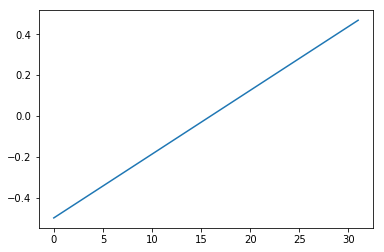

universe-dCR4wk-0 | [2017-05-10 01:32:33,453] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=4.6 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=5890.5 vnc_pixels_ps[total]=43503.2 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:32:33,455] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "57.54us", "mean": "130.63us"}, "reward.parsing.score": {"calls": 23, "std": "52.55us", "mean": "289.20us"}, "rewarder.compute_reward": {"calls": 301, "std": "183.45us", "mean": "343.94us"}, "score.crop_cache.get.MatchImage": {"calls": 69, "std": "13.03us", "mean": "32.46us"}, "reward.parsing.gameover": {"calls": 23, "std": "37.21us", "mean": "190.67us"}, "rewarder.frame": {"calls": 301, "std": "298.12us", "mean": "16.88ms"}, "rewarder.sleep": {"calls": 301, "std": "384.91us", "mean": "16.02ms"}, "score.crop_ca

[2017-05-09 23:17:45,100] [0:localhost:5900] Could not recalibrate network: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectError'>: An error occurred while connecting: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectionLost'>: Connection to the other side was lost in a non-clean fashion.
].
]
[2017-05-09 23:22:45,104] [0:localhost:5900] Could not recalibrate network: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectError'>: An error occurred while connecting: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectionLost'>: Connection to the other side was lost in a non-clean fashion.
].
]
[2017-05-09 23:27:45,107] [0:localhost:5900] Could not recalibrate network: [Failure instance: Traceback (failure with no frames): <class 'twisted.internet.error.ConnectError'>: An error occurred while connecting: [Failure instanc

In [39]:
height= int(snake_feature.get_shape()[0])
half_height=int(height/2)
col_multiplier = np.asarray([-((half_height-i)/height) for i in range(0, height)])

plt.plot(col_multiplier)




(32, 55, 1)
universe-dCR4wk-0 | [2017-05-10 01:28:59,210] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.05s, sent 1 reward messages to agent: reward=4.0 reward_min=4.0 reward_max=4.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1294}
(1, 1)
(1, 1)
[[ 0.07687333]]
(32, 55, 1)
(1, 1)
(1, 1)
[[ 0.0358725]]
(32, 55, 1)
(1, 1)
(1, 1)
[[ 0.07687333]]


((<tf.Tensor 'strided_slice_7:0' shape=(1, 1, 1) dtype=float32>,
  <tf.Tensor 'strided_slice_8:0' shape=(1, 1, 1) dtype=float32>),
 {<tf.Tensor 'filter1_4:0' shape=(32, 55, 1, 1) dtype=float32>: array([[[[ 0.        ]],
  
          [[ 0.        ]],
  
          [[ 0.        ]],
  
          ..., 
          [[ 0.        ]],
  
          [[ 0.        ]],
  
          [[ 0.        ]]],
  
  
         [[[ 0.00257787]],
  
          [[ 0.00257787]],
  
          [[ 0.00257787]],
  
          ..., 
          [[ 0.00257787]],
  
          [[ 0.00257787]],
  
          [[ 0.00257787]]],
  
  
         [[[ 0.00515574]],
  
          [[ 0.00515574]],
  
          [[ 0.00515574]],
  
          ..., 
          [[ 0.00515574]],
  
          [[ 0.00515574]],
  
          [[ 0.00515574]]],
  
  
         ..., 
         [[[ 0.0077336 ]],
  
          [[ 0.0077336 ]],
  
          [[ 0.0077336 ]],
  
          ..., 
          [[ 0.0077336 ]],
  
          [[ 0.0077336 ]],
  
          [[ 0.0077336 ]]]

universe-dCR4wk-0 | [2017-05-10 01:28:59,876] [INFO:universe.wrappers.logger] Stats for the past 5.01s: vnc_updates_ps=17.8 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=269622.4 vnc_pixels_ps[total]=478061.7 reward_lag=None rewarder_message_lag=None fps=59.07
universe-dCR4wk-0 | [2017-05-10 01:28:59,959] [INFO:universe.pyprofile] [pyprofile] period=5.01s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "162.91us", "mean": "159.00us"}, "score.crop_cache.readthrough.OCRScorerV0": {"calls": 5, "std": "1.35ms", "mean": "13.95ms"}, "reward.parsing.score": {"calls": 27, "std": "5.59ms", "mean": "2.95ms"}, "rewarder.compute_reward": {"calls": 301, "std": "1.94ms", "mean": "685.34us"}, "score.crop_cache.get.OCRScorerV0": {"calls": 27, "std": "36.59us", "mean": "95.96us"}, "score.crop_cache.readthrough.MatchImage": {"calls": 3, "std": "19.43us", "mean": "71.37us"}, "score.crop_cache.get.MatchImage": {"calls": 81, 

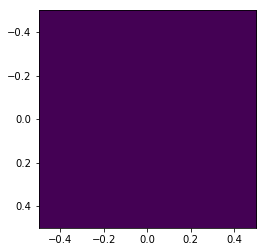

In [19]:
from scipy.stats import logistic  # for logistic.cdf (sigmoid)
def make_fully_connected_decaying_pull(feature_map, filters):
    print(feature_map.get_shape())
    width = int(feature_map.get_shape()[1])
    height= int(feature_map.get_shape()[0])
    half_width=int(width/2)
    half_height=int(height/2)
    # This is the main line right here:
    row_multiplier = np.asarray([-abs((half_width-i)/width)+.5 for i in range(0, width)])
    #col_multiplier = np.asarray([logistic.cdf(i-half_height) if i < half_height else 1-logistic.cdf(i-half_height) for i in range(0, height)])
    #row_multiplier = [math.log(i-half_width) if i != half_width else 0 for i in range(0, width)]
    #row_multiplier = row_multiplier / np.linalg.norm(row_multiplier)
    feature_pull_right = np.asarray([row_multiplier]*height)[:,:,np.newaxis,np.newaxis]
  
    #print(height,width)
    #print(row_multiplier.shape)
    #print(feature_pull_left.min(), feature_pull_left.max())
    #plt.plot(row_multiplier)
    #showarray(feature_pull_x.reshape(height, width))

        
    #col_multiplier = np.asarray([logistic.cdf(i-half_height) if i < half_height else 1-logistic.cdf(i-half_height) for i in range(0, height)])
    col_multiplier = np.asarray([-abs((half_height-i)/height)+.5 for i in range(0, height)])
    #col_multiplier = col_multiplier / np.linalg.norm(col_multiplier)
    feature_pull_down = np.asarray([col_multiplier]*width).T[:,:,np.newaxis,np.newaxis]

    #print(height,width)
    #print(col_multiplier.shape)
    #print(feature_pull_up.min(), feature_pull_up.max())
    #plt.plot(col_multiplier)
    #showarray(feature_pull_y.reshape(height, width))


    strides = [1,1,1,1]
    #mov_left, l, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_left, strides)
    mov_right, r, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_right, strides)
    #mov_up, u, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_up, strides)
    mov_down, d, filters = test_filter_and_stride(s1, feature_map, filters, feature_pull_down, strides)

    print (d)

    #return (mov_left, mov_right, mov_up, mov_down), filters
    return (mov_right, mov_down), filters

    

    
#make_fully_connected_decaying_pull(snake_feature, filters)
snake_directions, filters = make_fully_connected_decaying_pull(snake_feature, filters)
food_directions, filters = make_fully_connected_decaying_pull(food_feature, filters)
#
make_fully_connected_decaying_pull(snake_feature, filters)


In [20]:
snake_mult=1
food_mult=0
move_directions = snake_mult*np.asarray(snake_directions) + food_mult*np.asarray(food_directions)

In [21]:
sess.run(tuple(move_directions), feed_dict={**filters, **{input_pixels:s1}})

(array([[[-0.10438196]]], dtype=float32),
 array([[[ 0.07687333]]], dtype=float32))

In [22]:
#sess.run([tf.reshape(t,(1,)) for t in move_directions], feed_dict={**filters, **{input_pixels:s1}})
predict_direction = (tf.stack([tf.reshape(t,(1,)) for t in move_directions]))
predict_dir_percent = tf.sigmoid(predict_direction)

print(sess.run(predict_direction, feed_dict={**filters, **{input_pixels:s1}}))
print(sess.run(predict_dir_percent, feed_dict={**filters, **{input_pixels:s1}}))
#mouse_x = predict_dir_percent[1] - predict_dir_percent[0]
#mouse_y = predict_dir_percent[3] - predict_dir_percent[2]

[[-0.10438196]
 [ 0.07687333]]
[[ 0.47392815]
 [ 0.51920885]]


In [23]:
s1 = [None]
while True:
    s1 = til_screen_not_none(s1)
    vals = sess.run((predict_direction), feed_dict={**filters, **{input_pixels:s1}})
    print(vals)
    x = .8 if vals[0] > 0 else -.8
    y = .8 if vals[1] > 0 else -.8
    a = make_screen_pos_from_percentage(x,y)
    print('x,y: ', x,y)
    print('executing action: ',a)
    s1,r,d,v = env.step([[a]])
    print(r, d)
    import time
    time.sleep(1) # Send an action every .5 seconds


[2017-05-09 20:29:00,193] Throttle fell behind by 4.36s; lost 261.81 frames


waiting for not-none. Executing:  PointerEvent<x=0.2 y=0.2 buttonmask=True>


[2017-05-09 20:29:01,216] Throttle fell behind by 1.00s; lost 60.21 frames


[[-0.08273342]
 [-0.01585055]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]


[2017-05-09 20:29:02,234] Throttle fell behind by 1.00s; lost 60.01 frames


[[-0.03069109]
 [ 0.02297233]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[0.0] [False]


[2017-05-09 20:29:03,254] Throttle fell behind by 1.00s; lost 60.07 frames


[[-0.12655416]
 [-0.06675468]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]


[2017-05-09 20:29:04,279] Throttle fell behind by 1.01s; lost 60.43 frames


[[-0.02745419]
 [ 0.06142533]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:04,893] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=4.8 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=6249.6 vnc_pixels_ps[total]=46340.5 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:04,959] [INFO:universe.pyprofile] [pyprofile] period=5.00s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 300, "std": "466.48us", "mean": "208.37us"}, "reward.parsing.score": {"calls": 24, "std": "158.79us", "mean": "361.90us"}, "rewarder.compute_reward": {"calls": 300, "std": "526.51us", "mean": "474.47us"}, "score.crop_cache.get.MatchImage": {"calls": 72, "std": "33.99us", "mean": "47.36us"}, "reward.parsing.gameover": {"calls": 24, "std": "163.27us", "mean": "280.65us"}, "rewarder.frame": 

[2017-05-09 20:29:05,309] Throttle fell behind by 1.01s; lost 60.64 frames


[[-0.13225557]
 [ 0.03097185]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:05,643] [INFO:universe.utils] [gameover] Gameover screen detected: distance_n=[0.0, 0.0, 0.0] match_time=282us
universe-dCR4wk-0 | [2017-05-10 01:29:05,643] [INFO:gym_controlplane.reward.reward] RESET CAUSE: gameover state reached
universe-dCR4wk-0 | [2017-05-10 01:29:05,644] [INFO:root] [Rewarder] Resetting environment since done=True
universe-dCR4wk-0 | [2017-05-10 01:29:05,645] [INFO:root] [Rewarder] Triggering a reset on EnvController
universe-dCR4wk-0 | [2017-05-10 01:29:05,645] [INFO:root] [EnvStatus] Changing env_state: running (env_id=internet.SlitherIO-v0) -> resetting (env_id=internet.SlitherIO-v0) (episode_id: 2->3, fps=60)
universe-dCR4wk-0 | [2017-05-10 01:29:05,646] [INFO:root] [Rewarder] Blocking until env finishes resetting
universe-dCR4wk-0 | [2017-05-10 01:29:05,648] [INFO:root] [EnvController] 

[2017-05-09 20:29:17,377] Throttle fell behind by 1.00s; lost 60.22 frames


[[-0.09366845]
 [ 0.01981748]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[2.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:17,566] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.50s, sent 3 reward messages to agent: reward=9.0 reward_min=2.0 reward_max=4.0 done=False info={'rewarder.profile': '<2064 bytes>', 'rewarder.vnc.updates.bytes': 1294, 'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1}


[2017-05-09 20:29:18,406] Throttle fell behind by 1.01s; lost 60.62 frames


[[-0.14241183]
 [-0.01500381]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[4.0] [False]


[2017-05-09 20:29:19,425] Throttle fell behind by 1.00s; lost 60.04 frames


[[-0.01263477]
 [ 0.07827085]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:19,799] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.23s, sent 1 reward messages to agent: reward=1.0 reward_min=1.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1294}
[[-0.11871376]
 [ 0.00951304]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=True>
[1.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:21,082] [INFO:universe.wrappers.logger] Stats for the past 5.01s: vnc_updates_ps=13.2 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=27217.0 vnc_pixels_ps[total]=107008.6 reward_lag=None rewarder_message_lag=None fps=60.05
universe-dCR4wk-0 | [2017-05-10 01:29:21,082] [INFO:universe.pyprofile] [pyprofile] period=5.00s timer

[2017-05-09 20:29:21,457] Throttle fell behind by 1.00s; lost 60.02 frames


[[ 0.00745655]
 [-0.02920715]]
x,y:  0.8 -0.8
executing action:  PointerEvent<x=471.6 y=114.19999999999999 buttonmask=False>
[-9.0] [False]


[2017-05-09 20:29:22,476] Throttle fell behind by 1.00s; lost 60.05 frames


[[-0.038903  ]
 [ 0.04645135]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:23,082] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.00s, sent 2 reward messages to agent: reward=-6.0 reward_min=-7.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1294}


[2017-05-09 20:29:23,497] Throttle fell behind by 1.00s; lost 60.14 frames


[[-0.16860838]
 [-0.02843039]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[1.0] [False]
[[-0.11084335]
 [-0.12517773]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:25,515] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.43s, sent 1 reward messages to agent: reward=1.0 reward_min=1.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.pixels': 8800, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1190}


[2017-05-09 20:29:25,532] Throttle fell behind by 1.00s; lost 60.09 frames


[[-0.10819149]
 [-0.02605044]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[1.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:26,099] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=5.2 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=8292.9 vnc_pixels_ps[total]=43930.5 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:26,099] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "60.19us", "mean": "107.89us"}, "score.crop_cache.readthrough.OCRScorerV0": {"calls": 3, "std": "1.06ms", "mean": "6.98ms"}, "reward.parsing.score": {"calls": 26, "std": "2.31ms", "mean": "1.09ms"}, "rewarder.compute_reward": {"calls": 301, "std": "768.55us", "mean": "378.75us"}, "score.crop_cache.get.MatchImage": {"calls": 78, "std": "12.77us", "mean": "29.60us

[2017-05-09 20:29:29,597] Throttle fell behind by 1.00s; lost 60.03 frames


[[-0.14743336]
 [-0.01327678]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:29,699] [INFO:universe.rewarder.remote] [Rewarder] Over past 2.62s, sent 2 reward messages to agent: reward=2.0 reward_min=1.0 reward_max=1.0 done=False info={'rewarder.vnc.updates.pixels': 10000, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1346}


[2017-05-09 20:29:30,619] Throttle fell behind by 1.00s; lost 60.18 frames


[[-0.19690344]
 [-0.08965974]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:30,965] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.27s, sent 2 reward messages to agent: reward=-7.0 reward_min=-6.0 reward_max=-1.0 done=False info={'rewarder.vnc.updates.pixels': 10000, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1346}
universe-dCR4wk-0 | [2017-05-10 01:29:31,115] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=5.8 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=9651.6 vnc_pixels_ps[total]=46528.1 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:31,116] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "82.18us", "mean": "106.94us"}, "score.crop_cache.readthrough

[2017-05-09 20:29:31,640] Throttle fell behind by 1.00s; lost 60.18 frames


[[-0.09290075]
 [-0.06072799]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=True>
[-7.0] [False]


[2017-05-09 20:29:32,664] Throttle fell behind by 1.01s; lost 60.33 frames


[[-0.02888374]
 [ 0.10717461]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[0.0] [False]
[[-0.00956883]
 [ 0.03588881]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[0.0] [False]


[2017-05-09 20:29:34,702] Throttle fell behind by 1.00s; lost 60.26 frames


[[ 0.02226592]
 [ 0.03853819]]
x,y:  0.8 0.8
executing action:  PointerEvent<x=471.6 y=355.8 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:35,266] [INFO:universe.rewarder.remote] [Rewarder] Over past 4.30s, sent 3 reward messages to agent: reward=0.0 reward_min=-1.0 reward_max=1.0 done=False info={'rewarder.profile': '<1937 bytes>', 'rewarder.vnc.updates.bytes': 1294, 'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1}


[2017-05-09 20:29:35,722] Throttle fell behind by 1.00s; lost 60.08 frames


[[-0.28227633]
 [-0.22580646]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=True>
[1.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:36,132] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=5.2 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=8698.9 vnc_pixels_ps[total]=46969.3 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:36,133] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "51.29us", "mean": "98.71us"}, "score.crop_cache.readthrough.OCRScorerV0": {"calls": 3, "std": "611.50us", "mean": "7.74ms"}, "reward.parsing.score": {"calls": 26, "std": "2.56ms", "mean": "1.15ms"}, "rewarder.compute_reward": {"calls": 301, "std": "846.63us", "mean": "353.30us"}, "score.crop_cache.get.MatchImage": {"calls": 78, "std": "13.88us", "mean": "29.25us

[2017-05-09 20:29:38,773] Throttle fell behind by 1.00s; lost 60.02 frames


[[-0.22482421]
 [-0.12324336]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:39,499] [INFO:universe.rewarder.remote] [Rewarder] Over past 3.03s, sent 1 reward messages to agent: reward=7.0 reward_min=7.0 reward_max=7.0 done=False info={'rewarder.vnc.updates.pixels': 9600, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1294}
[[-0.1154523 ]
 [ 0.02466527]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=False>
[7.0] [False]


[2017-05-09 20:29:40,808] Throttle fell behind by 1.00s; lost 60.11 frames


[[-0.22313946]
 [-0.09862486]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:41,149] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=4.8 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=8518.5 vnc_pixels_ps[total]=45553.6 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:41,149] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "41.32us", "mean": "83.34us"}, "score.crop_cache.readthrough.OCRScorerV0": {"calls": 3, "std": "473.31us", "mean": "8.30ms"}, "reward.parsing.score": {"calls": 24, "std": "2.82ms", "mean": "1.28ms"}, "rewarder.compute_reward": {"calls": 301, "std": "880.35us", "mean": "332.43us"}, "score.crop_cache.get.MatchImage": {"calls": 72, "std": "7.89us", "mean": "26.78us"

[2017-05-09 20:29:42,844] Throttle fell behind by 1.00s; lost 60.10 frames


[[-0.06110274]
 [-0.03235572]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[3.0] [False]


[2017-05-09 20:29:43,866] Throttle fell behind by 1.00s; lost 60.23 frames


[[-0.11169399]
 [-0.00240474]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
[[-0.14213076]
 [-0.03183619]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
[[-0.15482934]
 [-0.11244271]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=False>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:46,165] [INFO:universe.wrappers.logger] Stats for the past 5.02s: vnc_updates_ps=6.0 n=1 reaction_time=None observation_lag=None action_lag=None reward_ps=0.0 reward_total=0.0 vnc_bytes_ps[total]=10146.0 vnc_pixels_ps[total]=49218.4 reward_lag=None rewarder_message_lag=None fps=60.01
universe-dCR4wk-0 | [2017-05-10 01:29:46,166] [INFO:universe.pyprofile] [pyprofile] period=5.02s timers={"vnc_env.VNCEnv.vnc_session.step": {"calls": 301, "std": "54.27us", "mean": "90.42us"}, "score.crop_cache.readthroug

[2017-05-09 20:29:48,949] Throttle fell behind by 1.00s; lost 60.17 frames


[[-0.23256564]
 [-0.15345635]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999999999999 buttonmask=True>
[0.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:49,582] [INFO:universe.rewarder.remote] [Rewarder] Over past 3.42s, sent 2 reward messages to agent: reward=0.0 reward_min=-3.0 reward_max=3.0 done=False info={'rewarder.vnc.updates.pixels': 8448, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 1145}
[[-0.04247599]
 [ 0.01759638]]
x,y:  -0.8 0.8
executing action:  PointerEvent<x=68.39999999999999 y=355.8 buttonmask=True>
[-3.0] [False]
universe-dCR4wk-0 | [2017-05-10 01:29:50,789] [INFO:universe.rewarder.remote] [Rewarder] Over past 1.21s, sent 2 reward messages to agent: reward=-1.0 reward_min=-3.0 reward_max=2.0 done=False info={'rewarder.vnc.updates.pixels': 1368, 'rewarder.vnc.updates.n': 1, 'rewarder.vnc.updates.bytes': 4124}
[[-0.05230725]
 [-0.00559281]]
x,y:  -0.8 -0.8
executing action:  PointerEvent<x=68.39999999999999 y=114.19999

KeyboardInterrupt: 